In [329]:
#import appropriate packages

import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
start = time.time()
import numpy
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# ETL

# Dataset 1 - COLET

In [330]:
#obtain wd - note all folders/files will need to be in here 

path = os.getcwd()
files = os.listdir()
files

['.ipynb_checkpoints',
 '2.csv',
 '3.csv',
 '85238500',
 'A2 Updated Copy.ipynb',
 'A2_220477645_2022.ipynb',
 'A2_WIP.ipynb',
 'Archive',
 'C0102100',
 'Colet',
 'Data temp',
 'data.mat',
 'DBSCAN.ipynb',
 'EnsembleLearning.ipynb',
 'important.txt',
 'keras_ensemblng-master',
 'keras_ensemblng-master.zip',
 'logs',
 'Log_ROC.png',
 'Other',
 'resultsZAB_SR.mat',
 'samples',
 'SIT720_A2_220477645_2022.ipynb',
 'SIT720_A3-Copy1.ipynb',
 'SIT720_A3_220477645.ipynb',
 'SIT720_A3_TEST.ipynb',
 'SIT720_A4.ipynb',
 'SIT720_A4v2.ipynb',
 'SIT720_A4v3.ipynb',
 'SIT723v1.ipynb',
 'StackedModel.ipynb',
 'StackedModel2.ipynb',
 'StackedModelWilliam.ipynb',
 'Task1_Subject_1.xlsx',
 'Task1_Subject_2.xlsx',
 'Task1_Subject_3.xlsx',
 'Task1_Subject_47.xlsx',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled4.ipynb',
 'Untitled5.ipynb']

In [331]:
#extract all excel files 

#IMPORTANT - MAKE SURE THE COLUMN HEADERS IN THE FIRST FILE ARE ALL THERE OTHERWISE THERE WILL BE ISSUES LATER ON!

files_xlsx = [f for f in files if f[-4:] == 'xlsx']
files_xlsx

['Task1_Subject_1.xlsx',
 'Task1_Subject_2.xlsx',
 'Task1_Subject_3.xlsx',
 'Task1_Subject_47.xlsx']

In [332]:
#blank dataframe to write to 
#we need one of these for each record type (i.e. 16) otherwise we are appending to differing columns
c_gaze_task1 = pd.DataFrame()
c_gaze_task2 = pd.DataFrame()
c_gaze_task3 = pd.DataFrame()
c_gaze_task4 = pd.DataFrame()
c_pupil_task1 = pd.DataFrame()
c_pupil_task2 = pd.DataFrame()
c_pupil_task3 = pd.DataFrame()
c_pupil_task4 = pd.DataFrame()
c_blinks_task1 = pd.DataFrame()
c_blinks_task2 = pd.DataFrame()
c_blinks_task3 = pd.DataFrame()
c_blinks_task4 = pd.DataFrame()
c_annotation_task1 = pd.DataFrame()
c_annotation_task2 = pd.DataFrame()
c_annotation_task3 = pd.DataFrame()
c_annotation_task4 = pd.DataFrame()

In [333]:
#loop through files - use read_excel - note sheet name 

#c stands for COLET

for f in files_xlsx:
    #data = pd.read_excel(f)
    data1 = pd.read_excel(f, sheet_name = 0)
    data1['file'] = f
    c_gaze_task1 = c_gaze_task1.append(data1)

In [334]:
c_gaze_task1 

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,5410.551715,0,0.999499,0.446264,0.846886,'5410.549631999999-0 5410.553797-1',-6.720630,-31.252881,80.700682,20.004033,...,-0.235298,-0.420213,0.876388,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx
1,5410.555834,0,0.999653,0.446534,0.847007,'5410.557871999999-0 5410.553797-1',-6.690706,-31.298388,80.793260,20.004033,...,-0.234840,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx
2,5410.559774,0,0.999648,0.446660,0.846410,'5410.557871999999-0 5410.561675-1',-6.664575,-31.211650,80.708374,20.004033,...,-0.234840,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx
3,5410.563583,0,0.999656,0.446442,0.845542,'5410.565490999999-0 5410.561675-1',-6.689463,-31.118351,80.664979,20.004033,...,-0.235225,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx
4,5410.568291,0,0.999565,0.446472,0.845614,'5410.565490999999-0 5410.571091999999-1',-6.683464,-31.115105,80.640260,20.004033,...,-0.235225,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278153,-0.390681,0.877496,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,639282.511133,0,0.999135,0.504802,0.624218,'639282.5092409999-0 639282.513024-1',2.767699,-26.751558,165.401616,20.026971,...,-0.090562,-0.211563,0.973160,-38.930624,14.731513,-22.411545,0.211969,-0.218064,0.952637,Task1_Subject_47.xlsx
6,639282.514991,0,0.998971,0.505357,0.625240,'639282.516958-0 639282.513024-1',2.930293,-27.025031,166.102479,20.026971,...,-0.089362,-0.212736,0.973015,-38.930624,14.731513,-22.411545,0.211969,-0.218064,0.952637,Task1_Subject_47.xlsx
7,639282.518975,1,0.999732,0.504967,0.625020,'639282.516958-0 639282.520991-1',2.841172,-27.149055,167.079379,20.026971,...,-0.089362,-0.212736,0.973015,-38.930624,14.731513,-22.411545,0.210511,-0.217212,0.953155,Task1_Subject_47.xlsx
8,639282.523855,1,0.999821,0.504576,0.624294,'639282.526719-0 639282.520991-1',2.726192,-26.954018,166.580320,20.026971,...,-0.090207,-0.211901,0.973119,-38.930624,14.731513,-22.411545,0.210511,-0.217212,0.953155,Task1_Subject_47.xlsx


In [335]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data2 = pd.read_excel(f, sheet_name = 1)
    data2['file'] = f
    c_gaze_task2 = c_gaze_task2.append(data2)
   

In [336]:
c_gaze_task2

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,4659.168013,0,0.999946,0.467168,0.841347,'4659.1660919999995-0 4659.169934-1',-3.465714,-28.025541,73.689623,19.490548,...,-0.216004,-0.404146,0.888824,-38.378552,14.746163,-23.063852,0.313394,-0.383356,0.868805,Task1_Subject_1.xlsx
1,4659.171724,0,0.999934,0.467982,0.841412,'4659.173514-0 4659.169934-1',-3.374369,-28.127372,73.947970,19.490548,...,-0.214639,-0.404058,0.889194,-38.378552,14.746163,-23.063852,0.313394,-0.383356,0.868805,Task1_Subject_1.xlsx
2,4659.175874,0,0.999912,0.467992,0.841952,'4659.173514-0 4659.178234999999-1',-3.372870,-28.163546,73.927925,19.490548,...,-0.214639,-0.404058,0.889194,-38.378552,14.746163,-23.063852,0.313423,-0.384043,0.868491,Task1_Subject_1.xlsx
3,4659.179746,0,0.999956,0.467042,0.841566,'4659.181258-0 4659.178234999999-1',-3.479495,-28.023615,73.637258,19.490548,...,-0.216234,-0.403766,0.888941,-38.378552,14.746163,-23.063852,0.313423,-0.384043,0.868491,Task1_Subject_1.xlsx
4,4659.183226,0,0.999976,0.467126,0.841238,'4659.181258-0 4659.185194-1',-3.466174,-27.978763,73.589596,19.490548,...,-0.216234,-0.403766,0.888941,-38.378552,14.746163,-23.063852,0.313692,-0.383646,0.868569,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,639838.056711,0,0.999029,0.442540,0.581747,'639838.052714-0 639838.060707-1',-16.969644,-24.557901,200.470721,20.131283,...,-0.164232,-0.174431,0.970877,-39.470190,14.928616,-21.280723,0.099401,-0.174394,0.979646,Task1_Subject_47.xlsx
7,639838.060703,1,0.999008,0.442241,0.581684,'639838.060698-0 639838.060707-1',-17.022781,-24.482566,199.942780,20.131283,...,-0.164844,-0.174577,0.970747,-39.470190,14.928616,-21.280723,0.099401,-0.174394,0.979646,Task1_Subject_47.xlsx
8,639838.064724,1,0.998996,0.442007,0.582979,'639838.06874-0 639838.060707-1',-17.062684,-24.667848,199.488395,20.131283,...,-0.165309,-0.176857,0.970255,-39.470190,14.928616,-21.280723,0.099401,-0.174394,0.979646,Task1_Subject_47.xlsx
9,639838.068740,1,0.999838,0.441773,0.584242,'639838.06874-0 639838.06874-1',-17.217794,-25.013175,200.372815,20.131283,...,-0.165309,-0.176857,0.970255,-39.470190,14.928616,-21.280723,0.098320,-0.176007,0.979467,Task1_Subject_47.xlsx


In [337]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data3 = pd.read_excel(f, sheet_name = 2)
    data3['file'] = f
    c_gaze_task3 = c_gaze_task3.append(data3)
   

In [338]:
c_gaze_task3

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,4925.733554,0,0.999807,0.455139,0.829161,'4925.733566-0 4925.733541-1',-5.210845,-28.369822,77.211448,21.275608,...,-0.245195,-0.411069,0.878010,-39.742654,14.772697,-20.876477,0.306528,-0.377348,0.873870,Task1_Subject_1.xlsx
1,4925.737495,0,0.999896,0.455489,0.827894,'4925.733566-0 4925.741424-1',-5.148993,-28.190206,77.013647,21.275608,...,-0.245195,-0.411069,0.878010,-39.742654,14.772697,-20.876477,0.307662,-0.375822,0.874130,Task1_Subject_1.xlsx
2,4925.741473,0,0.999911,0.455146,0.828076,'4925.741521999999-0 4925.741424-1',-5.186693,-28.163240,76.895547,21.275608,...,-0.245780,-0.411400,0.877691,-39.742654,14.772697,-20.876477,0.307662,-0.375822,0.874130,Task1_Subject_1.xlsx
3,4925.745420,0,0.999885,0.454981,0.828821,'4925.741521999999-0 4925.749317999999-1',-5.215824,-28.258688,76.985009,21.275608,...,-0.245780,-0.411400,0.877691,-39.742654,14.772697,-20.876477,0.307127,-0.376733,0.873925,Task1_Subject_1.xlsx
4,4925.749386,0,0.999868,0.454758,0.828875,'4925.749452999999-0 4925.749317999999-1',-5.240436,-28.236476,76.910377,21.275608,...,-0.246163,-0.411530,0.877523,-39.742654,14.772697,-20.876477,0.307127,-0.376733,0.873925,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,639566.797279,0,0.999788,0.491814,0.519363,'639566.7972789999-0',-1.778562,-26.183180,404.140141,-159.367464,...,0.315178,0.021839,0.948781,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_47.xlsx
2,639566.797279,0,0.289106,-0.035337,0.337312,'639566.7972789999-1',-295.737308,34.698536,189.612238,NaN,...,NaN,NaN,NaN,18.055202,-15.979357,-196.348915,-0.627585,0.101356,0.771922,Task1_Subject_47.xlsx
3,639566.805130,0,0.046449,0.003191,0.486696,'639566.80513-1',-266.421115,-11.844228,214.815438,NaN,...,NaN,NaN,NaN,18.055202,-15.979357,-196.348915,-0.568953,0.008270,0.822329,Task1_Subject_47.xlsx
4,639566.805130,0,0.999580,0.490935,0.517963,'639566.80513-0',-2.353010,-25.678403,404.318700,-159.367464,...,0.314029,0.022849,0.949138,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_47.xlsx


In [339]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data4 = pd.read_excel(f, sheet_name = 3)
    data4['file'] = f
    c_gaze_task4 = c_gaze_task4.append(data4)
   

In [340]:
c_gaze_task4 

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,5186.936018,0,0.999910,0.429778,0.894138,'5186.937763-0 5186.934273-1',-7.849854,-30.436482,68.829957,18.763117,...,-0.255538,-0.444614,0.858498,-37.711558,15.192075,-24.476072,0.276384,-0.423655,0.862629,Task1_Subject_1.xlsx
1,5186.939908,0,0.999884,0.429607,0.893521,'5186.937763-0 5186.942054-1',-7.883667,-30.444688,68.959266,18.763117,...,-0.255538,-0.444614,0.858498,-37.711558,15.192075,-24.476072,0.275779,-0.422871,0.863207,Task1_Subject_1.xlsx
2,5186.944288,0,0.999771,0.429758,0.893629,'5186.946523-0 5186.942054-1',-7.869988,-30.470123,68.998894,18.763117,...,-0.255302,-0.444724,0.858511,-37.711558,15.192075,-24.476072,0.275779,-0.422871,0.863207,Task1_Subject_1.xlsx
3,5186.947952,0,0.999775,0.429542,0.893677,'5186.946523-0 5186.949380999999-1',-7.913816,-30.541058,69.147955,18.763117,...,-0.255302,-0.444724,0.858511,-37.711558,15.192075,-24.476072,0.274999,-0.422905,0.863439,Task1_Subject_1.xlsx
4,5186.951829,0,0.999893,0.430029,0.894655,'5186.954277-0 5186.949380999999-1',-7.868716,-30.663442,69.251569,18.763117,...,-0.254523,-0.445863,0.858152,-37.711558,15.192075,-24.476072,0.274999,-0.422905,0.863439,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12910,52614.877325,308,0.962552,0.394029,0.447153,'52614.879475-0 52614.875175-1',-16.238837,0.085633,99.040731,19.537335,...,-0.285003,-0.119560,0.951041,-39.762441,15.229552,-21.292588,0.190412,-0.123837,0.973862,Task1_Subject_3.xlsx
0,640025.296110,0,0.999497,0.478851,0.525158,'640025.296785-0 640025.295436-1',-4.743559,-13.118953,187.148620,20.080337,...,-0.118515,-0.141020,0.982887,-39.651487,14.954359,-21.001203,0.163927,-0.124274,0.978613,Task1_Subject_47.xlsx
1,640025.300257,0,0.999432,0.478656,0.525293,'640025.296785-0 640025.303729-1',-4.818490,-13.186094,187.772445,20.080337,...,-0.118515,-0.141020,0.982887,-39.651487,14.954359,-21.001203,0.163110,-0.124132,0.978768,Task1_Subject_47.xlsx
2,640025.304283,0,0.999410,0.478280,0.525841,'640025.304837-0 640025.303729-1',-4.916878,-13.237121,187.161622,20.080337,...,-0.119312,-0.142249,0.982614,-39.651487,14.954359,-21.001203,0.163110,-0.124132,0.978768,Task1_Subject_47.xlsx


In [341]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data5 = pd.read_excel(f, sheet_name = 4)
    data5['file'] = f
    c_pupil_task1 = c_pupil_task1.append(data5)
   

In [342]:
c_pupil_task1

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,5410.553797,0,1,1.000000,0.406205,0.708513,40.757561,'2d c++',77.991356,55.965595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
1,5410.553797,0,1,0.999646,0.406235,0.708578,40.764095,'3d c++',77.997212,55.953014,...,-0.714380,1.971798,1.419294,-2.333954,145.942173,79.574077,187.867489,187.867489,90.0,Task1_Subject_1.xlsx
2,5410.557872,0,0,0.999661,0.326001,0.395972,38.729047,'3d c++',62.592283,115.973389,...,-0.699703,1.889488,1.768446,-2.346975,134.652012,92.929580,188.411042,188.411042,90.0,Task1_Subject_1.xlsx
3,5410.557872,0,0,1.000000,0.325980,0.396084,38.723305,'2d c++',62.588215,115.951805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
4,5410.561675,0,1,1.000000,0.406046,0.707954,40.842903,'2d c++',77.960808,56.072765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,639282.495590,0,0,1.000000,0.363838,0.247152,26.547726,'2d c++',69.856964,144.546906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_47.xlsx
4,639282.497210,0,1,1.000000,0.284040,0.815220,26.968079,'2d c++',54.535751,35.477821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_47.xlsx
5,639282.497210,0,1,0.999847,0.284031,0.815239,26.975793,'3d c++',54.534007,35.474133,...,-0.831114,1.465393,1.537888,-2.159675,110.194474,52.864463,165.065617,165.065617,90.0,Task1_Subject_47.xlsx
6,639282.501180,0,0,0.999884,0.363024,0.248144,26.986308,'3d c++',69.700572,144.356397,...,-0.810485,1.297797,1.856165,-2.135693,123.499487,105.951973,183.315744,183.315744,90.0,Task1_Subject_47.xlsx


In [343]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data6 = pd.read_excel(f, sheet_name = 5)
    data6['file'] = f
    c_pupil_task2 = c_pupil_task2.append(data6)
   

In [344]:
c_pupil_task2

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,4659.169934,0,1,1.000000,0.383349,0.709518,39.585670,'2d c++',73.602982,55.772636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
1,4659.169934,0,1,0.999989,0.383349,0.709497,39.582783,'3d c++',73.602915,55.776529,...,-0.691045,2.047310,1.432883,-2.369453,141.816092,76.930217,179.758212,179.758212,90.0,Task1_Subject_1.xlsx
2,4659.173514,0,0,1.000000,0.348162,0.349042,37.972534,'2d c++',66.847015,124.983849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,4659.173514,0,0,0.999880,0.348163,0.349008,37.976604,'3d c++',66.847372,124.990553,...,-0.718888,1.948367,1.753716,-2.321682,133.439111,102.086138,179.930302,179.930302,90.0,Task1_Subject_1.xlsx
4,4659.178235,0,1,0.999944,0.383273,0.709904,39.386227,'3d c++',73.588462,55.698340,...,-0.690810,2.037330,1.432163,-2.369687,141.816092,76.930217,179.758212,179.758212,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21890,51681.011299,178,1,0.999101,0.531063,0.603304,33.165341,'3d c++',101.964106,76.165727,...,-0.705635,1.647777,1.535491,-2.357652,165.736635,84.016347,185.182424,185.182424,90.0,Task1_Subject_3.xlsx
21891,51681.011299,178,1,1.000000,0.531062,0.603390,33.166504,'2d c++',101.963837,76.149086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_3.xlsx
0,639838.036782,0,1,1.000000,0.337256,0.796839,28.470936,'2d c++',64.753159,39.006924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_47.xlsx
1,639838.036782,0,1,0.999634,0.337210,0.796860,28.474834,'3d c++',64.744403,39.002832,...,-0.890529,1.452146,1.573733,-2.043077,111.589301,54.012871,170.072209,170.072209,90.0,Task1_Subject_47.xlsx


In [345]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data7 = pd.read_excel(f, sheet_name = 6)
    data7['file'] = f
    c_pupil_task3 = c_pupil_task3.append(data7)
   

In [346]:
c_pupil_task3

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,4925.733541,0,1,0.999716,0.396698,0.717863,39.984980,'3d c++',76.166063,54.170372,...,-0.697941,1.882471,1.438231,-2.360411,148.217415,76.821010,192.722410,192.722410,90.0,Task1_Subject_1.xlsx
1,4925.733541,0,1,1.000000,0.396681,0.717742,39.968163,'2d c++',76.162796,54.193523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
2,4925.733566,0,0,1.000000,0.336370,0.370211,38.975426,'2d c++',64.582977,120.919556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,4925.733566,0,0,0.999898,0.336366,0.370172,38.979005,'3d c++',64.582350,120.927035,...,-0.695439,1.788076,1.757177,-2.355361,140.381627,96.652712,197.635498,197.635498,90.0,Task1_Subject_1.xlsx
4,4925.741424,0,1,0.999894,0.396292,0.716681,40.184041,'3d c++',76.088124,54.397321,...,-0.697569,1.892244,1.439996,-2.361170,148.217415,76.821010,192.722410,192.722410,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,639566.789555,0,0,0.999480,0.325451,0.273331,32.293561,'3d c++',62.486584,139.520534,...,-0.819247,1.440200,1.785070,-2.147213,123.023040,106.907887,193.167801,193.167801,90.0,Task1_Subject_47.xlsx
2,639566.797279,0,1,0.289106,0.315979,0.794272,22.420868,'3d c++',60.667915,39.499686,...,-0.958322,6.479246,1.708976,-1.315324,58.292231,40.568504,37.841222,37.841222,90.0,Task1_Subject_47.xlsx
3,639566.797279,0,1,1.000000,0.309996,0.770745,30.774483,'2d c++',59.519276,44.016880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_47.xlsx
4,639566.797279,0,0,1.000000,0.325613,0.272422,32.013100,'2d c++',62.517639,139.695068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_47.xlsx


In [347]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data8 = pd.read_excel(f, sheet_name = 7)
    data8['file'] = f
    c_pupil_task4 = c_pupil_task4.append(data8)
   

In [348]:
c_pupil_task4

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,5186.934273,0,1,0.999998,0.406175,0.712463,41.279886,'3d c++',77.985519,55.207111,...,-0.704411,2.239127,1.384710,-2.342411,140.421651,79.844078,172.482422,172.482422,90.0,Task1_Subject_1.xlsx
1,5186.934273,0,1,1.000000,0.406178,0.712473,41.281082,'2d c++',77.986107,55.205215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
2,5186.937763,0,0,1.000000,0.310229,0.395438,39.079651,'2d c++',59.563965,116.075829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,5186.937763,0,0,0.999822,0.310204,0.395425,39.081583,'3d c++',59.559194,116.078464,...,-0.676369,2.057287,1.792133,-2.375560,129.829297,92.260623,178.962427,178.962427,90.0,Task1_Subject_1.xlsx
4,5186.942054,0,1,0.999945,0.406465,0.712099,41.363808,'3d c++',78.041339,55.277064,...,-0.705116,2.243082,1.385460,-2.341527,140.421651,79.844078,172.482422,172.482422,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,640025.303729,0,1,0.999070,0.309980,0.759367,28.760546,'3d c++',59.516123,46.201632,...,-0.859940,1.470119,1.630486,-2.103427,112.251284,54.098259,171.445345,171.445345,90.0,Task1_Subject_47.xlsx
3,640025.303729,0,1,1.000000,0.310036,0.759366,28.762396,'2d c++',59.526878,46.201714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_47.xlsx
4,640025.304837,0,0,0.999749,0.311029,0.269270,28.779217,'3d c++',59.717532,140.300135,...,-0.807341,1.338432,1.788974,-2.167940,120.873648,108.125225,188.140524,188.140524,90.0,Task1_Subject_47.xlsx
5,640025.304837,0,0,1.000000,0.311056,0.269212,28.792496,'2d c++',59.722824,140.311249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_47.xlsx


In [349]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data9 = pd.read_excel(f, sheet_name = 8)
    data9['file'] = f
    c_blinks_task1 = c_blinks_task1.append(data9)
   

In [350]:
c_blinks_task1 

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,5437.625617,0.236131,5437.861748,37,40,44,0.703872,'0.5068225043614704 0.5512669488059149 0.59571...,'5437.625617 5437.629564 5437.633621 5437.6378...,Task1_Subject_1.xlsx
1,2,5444.161561,0.180073,5444.341634,231,233,236,0.553669,'0.5048782729116744 0.5493227173561188 0.59287...,'5444.161561 5444.165642 5444.169793 5444.1755...,Task1_Subject_1.xlsx
0,1,52343.299652,0.208204,52343.507856,28,31,34,0.497812,'0.5083233621335544 0.552767806577999 0.597212...,'52343.299652 52343.303448 52343.307718000004 ...,Task1_Subject_3.xlsx
1,2,52351.271180,0.604479,52351.875659,266,275,284,0.268740,'0.5147965783708606 0.44519374716612836 0.4577...,'52351.27118 52351.275434 52351.279182 52351.2...,Task1_Subject_3.xlsx
2,1,52353.379248,0.263982,52353.643230,21,25,29,0.542674,'0.5349907679353413 0.5822504642600077 0.62330...,'52353.379248 52353.386182 52353.387143 52353....,Task1_Subject_3.xlsx
3,1,52361.799089,0.164946,52361.964035,29,31,34,0.540459,'0.5018592554834781 0.5463036999279226 0.59074...,'52361.799089 52361.806158 52361.807276 52361....,Task1_Subject_3.xlsx
4,1,52367.791491,0.224953,52368.016444,29,32,36,0.561267,'0.5407997933944411 0.5852442378388855 0.62968...,'52367.791491 52367.795185 52367.799383 52367....,Task1_Subject_3.xlsx
5,1,52377.051408,0.219801,52377.271209,20,23,27,0.609915,'0.503231993550923 0.5500859597340555 0.594530...,'52377.051408 52377.059281 52377.070968 52377....,Task1_Subject_3.xlsx


In [351]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data10 = pd.read_excel(f, sheet_name = 9)
    data10['file'] = f
    c_blinks_task2 = c_blinks_task2.append(data10)
   

In [352]:
c_blinks_task2

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,51644.207383,0.521524,51644.728907,246,254,262,0.277761,'0.528993998250003 0.5159779134200366 0.537140...,'51644.207383 51644.211833 51644.216024 51644....,Task1_Subject_3.xlsx
1,1,51653.099402,0.312177,51653.411579,213,218,223,0.294713,'0.5135580453080789 0.5302985577358857 0.57474...,'51653.099402 51653.103442 51653.107426 51653....,Task1_Subject_3.xlsx
2,1,51655.287540,0.212070,51655.499610,46,49,52,0.662804,'0.5341177971267324 0.5785622415711769 0.62300...,'51655.28754 51655.292708 51655.295653 51655.2...,Task1_Subject_3.xlsx
3,1,51675.564079,0.207355,51675.771434,16,19,22,0.544197,'0.5072108906156224 0.5074451554132569 0.57445...,'51675.564079 51675.569274 51675.571386 51675....,Task1_Subject_3.xlsx


In [353]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data11 = pd.read_excel(f, sheet_name = 10)
    data11['file'] = f
    c_blinks_task3 = c_blinks_task3.append(data11)
   

In [354]:
c_blinks_task3

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,4937.633752,0.219501,4937.853253,355,358,362,0.632858,'0.5145911521303596 0.559035596574804 0.603480...,'4937.633752 4937.637365 4937.642261 4937.6454...,Task1_Subject_1.xlsx
1,2,4938.933606,0.179660,4939.113266,394,396,399,0.594492,'0.5276674487690183 0.5721118932134627 0.61655...,'4938.933606 4938.9373909999995 4938.943244999...,Task1_Subject_1.xlsx
2,3,4942.313627,0.219615,4942.533242,495,498,501,0.643151,'0.5229700933989672 0.5674145378434114 0.61185...,'4942.3136269999995 4942.317322 4942.321507 49...,Task1_Subject_1.xlsx
3,1,4948.394007,0.575348,4948.969355,2,10,19,0.334890,'0.5038569896286232 0.5483014340730676 0.59274...,'4948.394007 4948.397762 4948.4018829999995 49...,Task1_Subject_1.xlsx
4,2,4949.149379,0.175898,4949.325277,25,27,30,0.562926,'0.5131920799712788 0.5576365244157233 0.60208...,'4949.1493789999995 4949.1532959999995 4949.15...,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...
33,5,639648.656770,0.228059,639648.884829,528,531,535,0.494219,'0.523832466867235 0.5682769113116793 0.612721...,'639648.65677 639648.664932 639648.664932 6396...,Task1_Subject_47.xlsx
34,6,639650.837128,0.255909,639651.093037,593,597,601,0.421827,'0.5262902416641894 0.5749735512192428 0.57282...,'639650.837128 639650.840895 639650.845029 639...,Task1_Subject_47.xlsx
35,7,639651.269247,0.219530,639651.488777,606,609,613,0.348409,'0.5006926483758709 0.45624820393142645 0.5031...,'639651.269247 639651.272853 639651.27791 6396...,Task1_Subject_47.xlsx
36,8,639655.684840,0.268051,639655.952891,738,742,746,0.561586,'0.5009489250227378 0.5453933694671824 0.55456...,'639655.68484 639655.68485 639655.692788 63965...,Task1_Subject_47.xlsx


In [355]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data12 = pd.read_excel(f, sheet_name = 11)
    data12['file'] = f
    c_blinks_task4 = c_blinks_task4.append(data12)
   

In [356]:
c_blinks_task4

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,5200.489894,0.628398,5201.118292,122,131,141,0.390568,'0.5071523680042445 0.551596812448689 0.596041...,'5200.489893999999 5200.493501 5200.497832 520...,Task1_Subject_1.xlsx
1,2,5201.585551,0.248134,5201.833685,155,158,162,0.624402,'0.5121954566591707 0.556639901103615 0.601084...,'5201.585551 5201.589585 5201.595933 5201.5976...,Task1_Subject_1.xlsx
0,1,90997.116431,0.208093,90997.324524,59,62,65,0.589238,'0.5088037159434569 0.5532481603879015 0.59769...,'90997.116431 90997.121122 90997.124455 90997....,Task1_Subject_2.xlsx
1,2,90997.652829,0.279633,90997.932462,75,79,83,0.634712,'0.5391463337742395 0.5835907782186839 0.62803...,'90997.652829 90997.656448 90997.660702 90997....,Task1_Subject_2.xlsx
2,3,91002.054042,0.214465,91002.268507,206,209,213,0.606721,'0.5076595276903548 0.5521039721347994 0.59654...,'91002.054042 91002.056646 91002.060434 91002....,Task1_Subject_2.xlsx
3,1,91008.652510,0.196229,91008.848739,4,7,10,0.550264,'0.5437622274763881 0.5882066719208326 0.63265...,'91008.65251 91008.65665 91008.660649 91008.66...,Task1_Subject_2.xlsx
4,2,91010.344604,3.856091,91014.200695,55,112,170,0.130683,'0.5352775153985769 0.49083307095413253 0.5496...,'91010.344604 91010.34881 91010.35763500001 91...,Task1_Subject_2.xlsx
5,3,91014.276639,1.135866,91015.412505,172,189,206,0.203592,'0.5485389705234104 0.4596500816345215 0.50453...,'91014.276639 91014.280634 91014.284698 91014....,Task1_Subject_2.xlsx
6,1,91028.196718,0.153789,91028.350507,35,37,40,0.456284,'0.5289310661787612 0.5733755106232057 0.57476...,'91028.196718 91028.201097 91028.204642 91028....,Task1_Subject_2.xlsx
7,1,91034.312683,0.288740,91034.601423,3,8,13,0.595363,'0.5003412615952418 0.5447857060396862 0.58923...,'91034.312683 91034.317427 91034.320856 91034....,Task1_Subject_2.xlsx


In [357]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data13 = pd.read_excel(f, sheet_name = 12)
    data13['file'] = f
    c_annotation_task1 = c_annotation_task1.append(data13)
   

In [358]:
c_annotation_task1

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx
0,20,10,20,10,20,15,15.8,Task1_Subject_2.xlsx
0,5,5,5,0,5,5,4.2,Task1_Subject_3.xlsx
0,5,5,5,0,10,5,5.0,Task1_Subject_47.xlsx


In [359]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data14 = pd.read_excel(f, sheet_name = 13)
    data14['file'] = f
    c_annotation_task2 = c_annotation_task2.append(data14)
   

In [360]:
c_annotation_task2

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,50,30,25,50,15,25,32.5,Task1_Subject_1.xlsx
0,50,10,60,30,30,25,34.2,Task1_Subject_2.xlsx
0,15,10,10,0,15,5,9.2,Task1_Subject_3.xlsx
0,10,5,5,45,20,10,15.8,Task1_Subject_47.xlsx


In [361]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data15 = pd.read_excel(f, sheet_name = 14)
    data15['file'] = f
    c_annotation_task3 = c_annotation_task3.append(data15)
   

In [362]:
c_annotation_task3

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,100,10,75,80,90,20,62.5,Task1_Subject_1.xlsx
0,50,10,20,25,50,20,29.2,Task1_Subject_2.xlsx
0,80,15,55,45,50,25,45.0,Task1_Subject_3.xlsx
0,50,10,20,50,75,10,35.8,Task1_Subject_47.xlsx


In [363]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data16 = pd.read_excel(f, sheet_name = 15)
    data16['file'] = f
    c_annotation_task4 = c_annotation_task4.append(data16)
   

In [364]:
c_annotation_task4

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,60,15,45,50,20,25,35.8,Task1_Subject_1.xlsx
0,85,10,90,90,80,85,73.3,Task1_Subject_2.xlsx
0,55,10,15,15,30,10,22.5,Task1_Subject_3.xlsx
0,50,5,10,10,50,5,21.7,Task1_Subject_47.xlsx


In [365]:
#not going to use the below - don't think subject info is important to analysis but leaving code in here in case I change my mind 

#for f in files_xlsx:
#    #data = pd.read_excel(f)
#    data = pd.read_excel(f, sheet_index = [16])
#    data['file'] = f
#    c_subjectinfo = df.append(data)
   

In [366]:
#check that the naming has worked
print(c_gaze_task1['file'].unique())

['Task1_Subject_1.xlsx' 'Task1_Subject_2.xlsx' 'Task1_Subject_3.xlsx'
 'Task1_Subject_47.xlsx']


In [367]:
#only interested in specific columns, so we will drop everything except those
#note that the 'file' column is the 'participant'

#Gaze data
c_gaze_task1 = c_gaze_task1.iloc[:, [0,6,7,8,21]]
c_gaze_task2 = c_gaze_task2.iloc[:, [0,6,7,8,21]]
c_gaze_task3 = c_gaze_task3.iloc[:, [0,6,7,8,21]]
c_gaze_task4 = c_gaze_task4.iloc[:, [0,6,7,8,21]]

#Pupil data
c_pupil_task1 = c_pupil_task1.iloc[:, [6,34]]
c_pupil_task2 = c_pupil_task2.iloc[:, [6,34]]
c_pupil_task3 = c_pupil_task3.iloc[:, [6,34]]
c_pupil_task4 = c_pupil_task4.iloc[:, [6,34]]

#Blink data - indx and file
c_blinks_task1 = c_blinks_task1.iloc[:, [5,10]]
c_blinks_task2 = c_blinks_task2.iloc[:, [5,10]]
c_blinks_task3 = c_blinks_task3.iloc[:, [5,10]]
c_blinks_task4 = c_blinks_task4.iloc[:, [5,10]]

#annotation data - mean and file
c_annotation_task1 = c_annotation_task1.iloc[:, [6,7]]
c_annotation_task2 = c_annotation_task2.iloc[:, [6,7]]
c_annotation_task3 = c_annotation_task3.iloc[:, [6,7]]
c_annotation_task4 = c_annotation_task4.iloc[:, [6,7]]

In [368]:
#get the difference between the previous value for each row

#Task 1
c_gaze_task1.sort_values(['file'], inplace=True)
c_gaze_task1['gaze_diff'] = c_gaze_task1.groupby('file')['gaze_timestamp'].diff()
c_gaze_task1['x_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task1['y_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task1['z_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task1['z_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_z'].diff()

#Task 2
c_gaze_task2.sort_values(['file'], inplace=True)
c_gaze_task2['gaze_diff'] = c_gaze_task2.groupby('file')['gaze_timestamp'].diff()
c_gaze_task2['x_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task2['y_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task2['z_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task2['z_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_z'].diff()

#Task 3
c_gaze_task3.sort_values(['file'], inplace=True)
c_gaze_task3['gaze_diff'] = c_gaze_task3.groupby('file')['gaze_timestamp'].diff()
c_gaze_task3['x_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task3['y_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task3['z_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task3['z_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_z'].diff()

#Task 4
c_gaze_task4.sort_values(['file'], inplace=True)
c_gaze_task4['gaze_diff'] = c_gaze_task4.groupby('file')['gaze_timestamp'].diff()
c_gaze_task4['x_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task4['y_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task4['z_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task4['z_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_z'].diff()

In [369]:
#square x, y and z

#Task 1
c_gaze_task1['x_diff^2'] = c_gaze_task1['x_diff']**2
c_gaze_task1['y_diff^2'] = c_gaze_task1['y_diff']**2
c_gaze_task1['z_diff^2'] = c_gaze_task1['z_diff']**2

#Task 2
c_gaze_task2['x_diff^2'] = c_gaze_task2['x_diff']**2
c_gaze_task2['y_diff^2'] = c_gaze_task2['y_diff']**2
c_gaze_task2['z_diff^2'] = c_gaze_task2['z_diff']**2

#Task 3
c_gaze_task3['x_diff^2'] = c_gaze_task3['x_diff']**2
c_gaze_task3['y_diff^2'] = c_gaze_task3['y_diff']**2
c_gaze_task3['z_diff^2'] = c_gaze_task3['z_diff']**2

#Task 4
c_gaze_task4['x_diff^2'] = c_gaze_task4['x_diff']**2
c_gaze_task4['y_diff^2'] = c_gaze_task4['y_diff']**2
c_gaze_task4['z_diff^2'] = c_gaze_task4['z_diff']**2

In [370]:
#sum x, y and z

column_names = ['x_diff^2','y_diff^2','z_diff^2']

#task 1
c_gaze_task1['sum']= c_gaze_task1[column_names].sum(axis=1)

#task 2
c_gaze_task2['sum']= c_gaze_task2[column_names].sum(axis=1)

#task 3
c_gaze_task3['sum']= c_gaze_task3[column_names].sum(axis=1)

#task 4
c_gaze_task4['sum']= c_gaze_task4[column_names].sum(axis=1)

In [371]:
#take sqrt of this value

#task 1
c_gaze_task1['sqrt']= np.sqrt(c_gaze_task1['sum'])

#task 2
c_gaze_task2['sqrt']= np.sqrt(c_gaze_task2['sum'])

#task 1
c_gaze_task3['sqrt']= np.sqrt(c_gaze_task3['sum'])

#task 1
c_gaze_task4['sqrt']= np.sqrt(c_gaze_task4['sum'])

In [372]:
#multiply by displacement to obtain velocity

#task 1
c_gaze_task1['velocity'] = c_gaze_task1['gaze_diff'] / c_gaze_task1['sqrt']

#task 2
c_gaze_task2['velocity'] = c_gaze_task2['gaze_diff'] / c_gaze_task2['sqrt']

#task 3
c_gaze_task3['velocity'] = c_gaze_task3['gaze_diff'] / c_gaze_task3['sqrt']

#task 4
c_gaze_task4['velocity'] = c_gaze_task4['gaze_diff'] / c_gaze_task4['sqrt']

In [373]:
# make a column with 1 or 0 for saccade

#may be able to drop this 

#task 1
#c_gaze_task1['saccade_flag'] = np.where(c_gaze_task1['velocity'] > 0.45, 1, 0)

#task 2
#c_gaze_task2['saccade_flag'] = np.where(c_gaze_task2['velocity'] > 0.45, 1, 0)

#task 3
#c_gaze_task3['saccade_flag'] = np.where(c_gaze_task3['velocity'] > 0.45, 1, 0)

#task 4
#c_gaze_task4['saccade_flag'] = np.where(c_gaze_task4['velocity'] > 0.45, 1, 0)

In [374]:
#fixation flag

#task 1
c_gaze_task1['fixation_flag'] = np.where((c_gaze_task1['velocity'] < 0.45) & (c_gaze_task1['gaze_diff']) > 0.55, 1, 0)

#task 2
c_gaze_task2['fixation_flag'] = np.where((c_gaze_task2['velocity'] < 0.45) & (c_gaze_task2['gaze_diff']) > 0.55, 1, 0)

#task 3
c_gaze_task3['fixation_flag'] = np.where((c_gaze_task3['velocity'] < 0.45) & (c_gaze_task3['gaze_diff']) > 0.55, 1, 0)

#task 4
c_gaze_task4['fixation_flag'] = np.where((c_gaze_task4['velocity'] < 0.45) & (c_gaze_task4['gaze_diff']) > 0.55, 1, 0)

In [375]:
#change into groups

#task 1
c_gaze_task1['fix_group'] = c_gaze_task1.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

#task 2
c_gaze_task2['fix_group'] = c_gaze_task2.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

#task 3
c_gaze_task3['fix_group'] = c_gaze_task3.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

#task 4
c_gaze_task4['fix_group'] = c_gaze_task4.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

In [376]:
#creating our final flag - where there is a fixation group and there is a fixation

#task 1
c_gaze_task1['fixation_group_flag'] = np.where((c_gaze_task1['fixation_flag'] > 0) & (c_gaze_task1['fix_group'] > 0), 1, 0)

#task 1
c_gaze_task2['fixation_group_flag'] = np.where((c_gaze_task2['fixation_flag'] > 0) & (c_gaze_task2['fix_group'] > 0), 1, 0)

#task 1
c_gaze_task3['fixation_group_flag'] = np.where((c_gaze_task3['fixation_flag'] > 0) & (c_gaze_task3['fix_group'] > 0), 1, 0)

#task 1
c_gaze_task4['fixation_group_flag'] = np.where((c_gaze_task4['fixation_flag'] > 0) & (c_gaze_task4['fix_group'] > 0), 1, 0)

In [377]:
#creating our final flag - fiation non group flag - i.e. is a fixation but not part of a group 

#task 1
c_gaze_task1['fix_non_group_flag'] = np.where((c_gaze_task1['fixation_flag'] > 0) & (c_gaze_task1['fix_group'] < 1), 1, 0)

#task 1
c_gaze_task2['fix_non_group_flag'] = np.where((c_gaze_task2['fixation_flag'] > 0) & (c_gaze_task2['fix_group'] < 1), 1, 0)

#task 1
c_gaze_task3['fix_non_group_flag'] = np.where((c_gaze_task3['fixation_flag'] > 0) & (c_gaze_task3['fix_group'] < 1), 1, 0)

#task 1
c_gaze_task4['fix_non_group_flag'] = np.where((c_gaze_task4['fixation_flag'] > 0) & (c_gaze_task4['fix_group'] < 1), 1, 0)

In [378]:
c_gaze_task1

,gaze_timestamp,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,file,gaze_diff,x_diff,y_diff,z_diff,x_diff^2,y_diff^2,z_diff^2,sum,sqrt,velocity,fixation_flag,fix_group,fixation_group_flag,fix_non_group_flag
0,5410.551715,-6.720630,-31.252881,80.700682,Task1_Subject_1.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0,1,0,0
1,5410.555834,-6.690706,-31.298388,80.793260,Task1_Subject_1.xlsx,0.004120,0.029924,-0.045507,0.092578,0.000895,0.002071,0.008571,0.011537,0.107410,0.038358,1,2,1,0
2,5410.559774,-6.664575,-31.211650,80.708374,Task1_Subject_1.xlsx,0.003939,0.026131,0.086737,-0.084886,0.000683,0.007523,0.007206,0.015412,0.124144,0.031729,1,2,1,0
3,5410.563583,-6.689463,-31.118351,80.664979,Task1_Subject_1.xlsx,0.003809,-0.024888,0.093299,-0.043395,0.000619,0.008705,0.001883,0.011207,0.105864,0.035985,1,2,1,0
4,5410.568291,-6.683464,-31.115105,80.640260,Task1_Subject_1.xlsx,0.004708,0.005999,0.003246,-0.024719,0.000036,0.000011,0.000611,0.000658,0.025643,0.183617,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,639282.499195,2.629046,-26.602967,165.568805,Task1_Subject_47.xlsx,0.006801,-0.022287,0.592062,-2.321850,0.000497,0.350537,5.390989,5.742023,2.396252,0.002838,1,338,1,0
1,639282.496400,2.798337,-26.908290,166.296137,Task1_Subject_47.xlsx,-0.002795,0.169291,-0.305324,0.727332,0.028659,0.093222,0.529012,0.650894,0.806780,-0.003464,1,338,1,0
8,639282.523855,2.726192,-26.954018,166.580320,Task1_Subject_47.xlsx,0.027455,-0.072144,-0.045727,0.284183,0.005205,0.002091,0.080760,0.088056,0.296742,0.092521,1,338,1,0
3,639282.503140,2.637877,-26.583691,165.474491,Task1_Subject_47.xlsx,-0.020715,-0.088316,0.370326,-1.105829,0.007800,0.137142,1.222858,1.367799,1.169530,-0.017713,1,338,1,0


In [379]:
#doing counts seems to actually update the dataframe - making copies to avoid this issue

c_gaze_task1sac = c_gaze_task1
c_gaze_task1_fixgr = c_gaze_task1
c_gaze_task1_fix_nongr =  c_gaze_task1

c_gaze_task2sac = c_gaze_task2
c_gaze_task2_fixgr = c_gaze_task2
c_gaze_task2_fix_nongr =  c_gaze_task2

c_gaze_task3sac = c_gaze_task3
c_gaze_task3_fixgr = c_gaze_task3
c_gaze_task3_fix_nongr =  c_gaze_task3

c_gaze_task4sac = c_gaze_task4
c_gaze_task4_fixgr = c_gaze_task4
c_gaze_task4_fix_nongr =  c_gaze_task4

In [380]:
#get each of these into the dataframe and then join - i.e. one df is saccades, one is fixations, join on 'file'
#note - keeping the dataframe in the same format by using reset index
#renaming column to make life easier

#task 1 fixation gruop flag count
c_gaze_task1_fix_gr = c_gaze_task1_fixgr.groupby('file')['fixation_group_flag'].sum().reset_index()
c_gaze_task1_fix_gr = c_gaze_task1_fix_gr.rename(columns={'fixation_group_flag': 'fixation_group_flag_count'})
c_gaze_task1_fix_gr['task']='1'

#non group flag

c_gaze_task1_fix_non_gr = c_gaze_task1_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task1_fix_non_gr  = c_gaze_task1_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task1_fix_non_gr['task']='1'

#saccades
c_gaze_task1_sac = c_gaze_task1sac[c_gaze_task1sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task1_sac = c_gaze_task1_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task1_sac['task']='1'

#task 2
# fixation gruop flag count
c_gaze_task2_fix_gr = c_gaze_task2_fixgr.groupby('file')['fixation_group_flag'].sum().reset_index()
c_gaze_task2_fix_gr = c_gaze_task2_fix_gr.rename(columns={'fixation_group_flag': 'fixation_group_flag_count'})
c_gaze_task2_fix_gr['task']='2'

#non group flag

c_gaze_task2_fix_non_gr = c_gaze_task2_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task2_fix_non_gr  = c_gaze_task2_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task2_fix_non_gr['task']='2'

#saccades
c_gaze_task2_sac = c_gaze_task2sac[c_gaze_task2sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task2_sac = c_gaze_task2_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task2_sac['task']='2'

#task 3
#task 1 fixation gruop flag count
c_gaze_task3_fix_gr = c_gaze_task3_fixgr.groupby('file')['fixation_group_flag'].sum().reset_index()
c_gaze_task3_fix_gr = c_gaze_task3_fix_gr.rename(columns={'fixation_group_flag': 'fixation_group_flag_count'})
c_gaze_task3_fix_gr['task']='3'

#non group flag

c_gaze_task3_fix_non_gr = c_gaze_task3_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task3_fix_non_gr  = c_gaze_task3_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task3_fix_non_gr['task']='3'

#saccades
c_gaze_task3_sac = c_gaze_task3sac[c_gaze_task3sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task3_sac = c_gaze_task3_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task3_sac['task']='3'

#task 4
#task 4 fixation gruop flag count
c_gaze_task4_fix_gr = c_gaze_task4_fixgr.groupby('file')['fixation_group_flag'].sum().reset_index()
c_gaze_task4_fix_gr = c_gaze_task4_fix_gr.rename(columns={'fixation_group_flag': 'fixation_group_flag_count'})
c_gaze_task4_fix_gr['task']='4'

#non group flag

c_gaze_task4_fix_non_gr = c_gaze_task4_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task4_fix_non_gr = c_gaze_task4_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task4_fix_non_gr['task']='1'

#saccades
c_gaze_task4_sac = c_gaze_task4sac[c_gaze_task4sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task4_sac = c_gaze_task4_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task4_sac['task']='4'

In [381]:
c_gaze_task4_fix_non_gr

,file,fix_non_group_flag_count,task
0,Task1_Subject_1.xlsx,0,1
1,Task1_Subject_2.xlsx,0,1
2,Task1_Subject_3.xlsx,0,1
3,Task1_Subject_47.xlsx,0,1


In [382]:
#joining together so we can sum 
#task 1
c_gaze_task1_fix = pd.concat([c_gaze_task1_fix_gr,c_gaze_task1_fix_non_gr], axis=1, join='inner')

#task 2
c_gaze_task2_fix = pd.concat([c_gaze_task2_fix_gr,c_gaze_task2_fix_non_gr], axis=1, join='inner')

#task 3
c_gaze_task3_fix = pd.concat([c_gaze_task3_fix_gr,c_gaze_task3_fix_non_gr], axis=1, join='inner')

#task 4
c_gaze_task4_fix = pd.concat([c_gaze_task4_fix_gr,c_gaze_task4_fix_non_gr], axis=1, join='inner')

In [383]:
#summing together

c_gaze_task1_fix['fixation_count'] = c_gaze_task1_fix['fixation_group_flag_count'] + c_gaze_task1_fix['fix_non_group_flag_count']
c_gaze_task2_fix['fixation_count'] = c_gaze_task2_fix['fixation_group_flag_count'] + c_gaze_task2_fix['fix_non_group_flag_count']
c_gaze_task3_fix['fixation_count'] = c_gaze_task3_fix['fixation_group_flag_count'] + c_gaze_task3_fix['fix_non_group_flag_count']
c_gaze_task4_fix['fixation_count'] = c_gaze_task4_fix['fixation_group_flag_count'] + c_gaze_task4_fix['fix_non_group_flag_count']

In [384]:
#selecting required fields 

c_gaze_task1_fix = c_gaze_task1_fix[['file','task','fixation_count']]
c_gaze_task2_fix = c_gaze_task2_fix[['file','task','fixation_count']]
c_gaze_task3_fix = c_gaze_task3_fix[['file','task','fixation_count']]
c_gaze_task4_fix = c_gaze_task4_fix[['file','task','fixation_count']]

In [385]:
#end up with doubles due to join 

c_gaze_task1_fix = c_gaze_task1_fix.iloc[:, [0, 2, 4]]
c_gaze_task2_fix = c_gaze_task2_fix.iloc[:, [0, 2, 4]]
c_gaze_task3_fix = c_gaze_task3_fix.iloc[:, [0, 2, 4]]
c_gaze_task4_fix = c_gaze_task4_fix.iloc[:, [0, 2, 4]]

In [386]:
c_gaze_task3_fix

,file,task,fixation_count
0,Task1_Subject_1.xlsx,3,8
1,Task1_Subject_2.xlsx,3,10208
2,Task1_Subject_3.xlsx,3,20759
3,Task1_Subject_47.xlsx,3,3


In [387]:
#join saccades and fixations together 

#task 1
c_gaze_task1 = pd.concat([c_gaze_task1_fix.set_index('file'),c_gaze_task1_sac.set_index('file')], axis=1, join='inner')
c_gaze_task1['file'] = c_gaze_task1.index

#task 2
c_gaze_task2 = pd.concat([c_gaze_task2_fix.set_index('file'),c_gaze_task2_sac.set_index('file')], axis=1, join='inner')
c_gaze_task2['file'] = c_gaze_task2.index
#task 3
c_gaze_task3 = pd.concat([c_gaze_task3_fix.set_index('file'),c_gaze_task3_sac.set_index('file')], axis=1, join='inner')
c_gaze_task3['file'] = c_gaze_task3.index
#task 4
c_gaze_task4 = pd.concat([c_gaze_task4_fix.set_index('file'),c_gaze_task4_sac.set_index('file')], axis=1, join='inner')
c_gaze_task4['file'] = c_gaze_task4.index

In [388]:
a1 = c_gaze_task1
b1 = c_gaze_task2
c1 = c_gaze_task3
d1 = c_gaze_task4

In [389]:
a1 = a1.reset_index(drop = True)
b1 = b1.reset_index(drop = True)
c1 = c1.reset_index(drop = True)
d1 = d1.reset_index(drop = True)

In [390]:
a1 = a1.iloc[:,[0, 1, 2, 4]]
b1 = b1.iloc[:,[0, 1, 2, 4]]
c1 = c1.iloc[:,[0, 1, 2, 4]]
d1 = d1.iloc[:,[0, 1, 2, 4]]

In [391]:
#append all together
#gaze_final = pd.concat([c_gaze_task1, c_gaze_task2, c_gaze_task3, c_gaze_task4], ignore_index=True)

In [392]:
#reset the indexes as we are getting duplicates and unable to select with both index of file and column of file
#c_gaze_task1.reset_index(drop = True, inplace = True)
#c_gaze_task2.reset_index(drop = True, inplace = True)
#c_gaze_task3.reset_index(drop = True, inplace = True)
#c_gaze_task4.reset_index(drop = True, inplace = True)


In [393]:
test =  pd.concat([a1, b1], ignore_index=True, sort=False)
test1 = pd.concat([test, c1], ignore_index=True, sort=False)
test2 = pd.concat([test1, d1], ignore_index=True, sort=False)

In [394]:
#a = pd.merge(a1, b1, on=['file'])
#b = pd.merge(a, c_gaze_task3, on=['file'])
#c = pd.merge(b, c_gaze_task4, on=['file'])

In [395]:
#c

In [396]:
#c = c[['file','task,''fixation_count_x','saccade_count_x']]

In [397]:
gaze_final = test2
#df_new = df.iloc[:, [0,1,3]]

In [398]:
gaze_final

,task,fixation_count,saccade_count,file
0,1,10150,12,Task1_Subject_2.xlsx
1,1,10093,156,Task1_Subject_3.xlsx
2,2,7110,8,Task1_Subject_2.xlsx
3,2,10864,82,Task1_Subject_3.xlsx
4,3,10208,16,Task1_Subject_2.xlsx
5,3,20759,308,Task1_Subject_3.xlsx
6,4,11925,27,Task1_Subject_2.xlsx
7,4,12776,132,Task1_Subject_3.xlsx


In [400]:
#average pupil diameter 

#task 1
c_pupil_task1 = c_pupil_task1.groupby(['file']).mean().reset_index()
c_pupil_task1 = c_pupil_task1.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task1['task']='1'

#task 2
c_pupil_task2 = c_pupil_task2.groupby(['file']).mean().reset_index()
c_pupil_task2 = c_pupil_task2.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task2['task']='2'

#task 3
c_pupil_task3 = c_pupil_task3.groupby(['file']).mean().reset_index()
c_pupil_task3 = c_pupil_task3.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task3['task']='3'

#task 4
c_pupil_task4 = c_pupil_task4.groupby(['file']).mean().reset_index()
c_pupil_task4 = c_pupil_task4.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task4['task']='4'

In [401]:
#append all together
pupil_final = pd.concat([c_pupil_task1, c_pupil_task2,c_pupil_task3, c_pupil_task4 ], ignore_index=True)

In [402]:
pupil_final

,file,avg_diameter,task
0,Task1_Subject_1.xlsx,40.011219,1
1,Task1_Subject_2.xlsx,31.483623,1
2,Task1_Subject_3.xlsx,30.711831,1
3,Task1_Subject_47.xlsx,26.900776,1
4,Task1_Subject_1.xlsx,38.900764,2
5,Task1_Subject_2.xlsx,33.249586,2
6,Task1_Subject_3.xlsx,31.228518,2
7,Task1_Subject_47.xlsx,28.644295,2
8,Task1_Subject_1.xlsx,39.710923,3
9,Task1_Subject_2.xlsx,32.508784,3


In [403]:
#count of blinks 
#task 1
c_blinks_task1 = c_blinks_task1.groupby(['file']).count().reset_index()
c_blinks_task1 = c_blinks_task1.rename(columns={'index': 'count_blinks'})
c_blinks_task1['task']='1'
#task 2
c_blinks_task2 = c_blinks_task2.groupby(['file']).count().reset_index()
c_blinks_task2 = c_blinks_task2.rename(columns={'index': 'count_blinks'})
c_blinks_task2['task']='2'
#task 3
c_blinks_task3 = c_blinks_task3.groupby(['file']).count().reset_index()
c_blinks_task3 = c_blinks_task3.rename(columns={'index': 'count_blinks'})
c_blinks_task3['task']='3'
#task 4
c_blinks_task4 = c_blinks_task4.groupby(['file']).count().reset_index()
c_blinks_task4 = c_blinks_task4.rename(columns={'index': 'count_blinks'})
c_blinks_task4['task']='4'

In [404]:
#append all together
blinks_final = pd.concat([c_blinks_task1, c_blinks_task2,c_blinks_task3, c_blinks_task4 ], ignore_index=True)

In [405]:
blinks_final

,file,count_blinks,task
0,Task1_Subject_1.xlsx,2,1
1,Task1_Subject_3.xlsx,6,1
2,Task1_Subject_3.xlsx,4,2
3,Task1_Subject_1.xlsx,14,3
4,Task1_Subject_2.xlsx,6,3
5,Task1_Subject_3.xlsx,18,3
6,Task1_Subject_47.xlsx,38,3
7,Task1_Subject_1.xlsx,2,4
8,Task1_Subject_2.xlsx,10,4
9,Task1_Subject_3.xlsx,7,4


In [406]:
c_annotation_task1['task']='1'
c_annotation_task2['task']='2'
c_annotation_task3['task']='3'
c_annotation_task4['task']='4'

In [407]:
#no preprocessing required for annotations, will just append all together
annotation_final = pd.concat([c_annotation_task1, c_annotation_task2,c_annotation_task3, c_annotation_task4 ], ignore_index=True)

In [408]:
annotation_final

,mean_1,file,task
0,15.0,Task1_Subject_1.xlsx,1
1,15.8,Task1_Subject_2.xlsx,1
2,4.2,Task1_Subject_3.xlsx,1
3,5.0,Task1_Subject_47.xlsx,1
4,32.5,Task1_Subject_1.xlsx,2
5,34.2,Task1_Subject_2.xlsx,2
6,9.2,Task1_Subject_3.xlsx,2
7,15.8,Task1_Subject_47.xlsx,2
8,62.5,Task1_Subject_1.xlsx,3
9,29.2,Task1_Subject_2.xlsx,3


In [409]:
final1 = blinks_final.merge(annotation_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])
final2 = final1.merge(pupil_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])
colet_final = final2.merge(gaze_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])

In [410]:
colet_final

,file,count_blinks,task,mean_1,avg_diameter,fixation_count,saccade_count
0,Task1_Subject_1.xlsx,2.0,1,15.0,40.011219,NaN,NaN
1,Task1_Subject_3.xlsx,6.0,1,4.2,30.711831,10093.0,156.0
2,Task1_Subject_3.xlsx,4.0,2,9.2,31.228518,10864.0,82.0
3,Task1_Subject_1.xlsx,14.0,3,62.5,39.710923,NaN,NaN
4,Task1_Subject_2.xlsx,6.0,3,29.2,32.508784,10208.0,16.0
5,Task1_Subject_3.xlsx,18.0,3,45.0,31.228518,20759.0,308.0
6,Task1_Subject_47.xlsx,38.0,3,35.8,30.305504,NaN,NaN
7,Task1_Subject_1.xlsx,2.0,4,35.8,40.699734,NaN,NaN
8,Task1_Subject_2.xlsx,10.0,4,73.3,32.508784,11925.0,27.0
9,Task1_Subject_3.xlsx,7.0,4,22.5,32.852488,12776.0,132.0


In [411]:
#checkign time to run

end = time.time()
print(end - start)

1527.1100265979767


In [412]:
# change mean_1 into a categorical value for later
#high, medium and low CW levels for workload score between 50–100, 30–49 and 0–29 respectively

#colet_final['cog_load'] = np.where(colet_final['mean_1'] < 29, 1,)


# Dataset 2

In [413]:
#fixations
#mla for machine learning approach

mla_fixations = pd.read_excel(r'D:\SIT723\Data Set\A Machine Learning Approach for Detecting Cognitive Interference Based on Eye-Tracking Data\Fixation_report_09092019\fixation_finale.xlsx')
mla_fixations = mla_fixations[['RECORDING_SESSION_LABEL','CURRENT_FIX_PUPIL','TRIAL_INDEX']]

In [414]:
#count of fixations by task by participant
#mla_fixations['CURRENT_FIX_PUPIL'].groupby(mla_fixations['RECORDING_SESSION_LABEL']).value_counts()

#mla_fixations.groupby(['RECORDING_SESSION_LABEL','CURRENT_FIX_PUPIL']).size().reset_index(name='counts')
mla_fixations_1 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 1]
mla_fixations_1 = mla_fixations_1.drop('TRIAL_INDEX', axis=1)
mla_fixations_2 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 2]
mla_fixations_2 = mla_fixations_2.drop('TRIAL_INDEX', axis=1)
mla_fixations_3 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 3]
mla_fixations_3 = mla_fixations_3.drop('TRIAL_INDEX', axis=1)
mla_fixations_4 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 4]
mla_fixations_4 = mla_fixations_4.drop('TRIAL_INDEX', axis=1)

In [415]:
mla_fixations_1

,RECORDING_SESSION_LABEL,CURRENT_FIX_PUPIL
0,10,423
1,10,420
2,10,391
3,10,386
4,10,402
...,...,...
16878,9,351
16879,9,305
16880,9,268
16881,9,269


In [416]:
#task 1
mla_fixations_1 = mla_fixations_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_1['task']='1'
#task 2
mla_fixations_2 = mla_fixations_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_2['task']='2'
#task 3
mla_fixations_3 = mla_fixations_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_3['task']='1'
#task 4
mla_fixations_4 = mla_fixations_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_4['task']='1'

In [417]:
mla_fixations_final = pd.concat([mla_fixations_1, mla_fixations_2,mla_fixations_3, mla_fixations_4 ], ignore_index=True)
#recording session label is the participant 
mla_fixations_final

,RECORDING_SESSION_LABEL,CURRENT_FIX_PUPIL,task
0,2,77,1
1,3,82,1
2,4,44,1
3,5,99,1
4,6,92,1
...,...,...,...
251,63,27,1
252,64,55,1
253,65,42,1
254,66,68,1


In [418]:
#gaze

#the actual file is corrupt - can't open it as it is, and it is too large to open in excel and change file type - it loses some of the data at the bottom. This is as good as I can get it 
mla_gaze = pd.read_excel(r'D:\SIT723\Data Set\A Machine Learning Approach for Detecting Cognitive Interference Based on Eye-Tracking Data\ReportGaze_09092019\gaze_final.xlsx')

In [419]:
#left pupil
mla_gaze_left = mla_gaze
mla_gaze_left = mla_gaze_left[['RECORDING_SESSION_LABEL','LEFT_PUPIL_SIZE','TRIAL_INDEX']]

In [420]:
mla_gaze_left_1 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 1]
mla_gaze_left_1 = mla_gaze_left_1.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_2 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 2]
mla_gaze_left_2 = mla_gaze_left_2.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_3 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 3]
mla_gaze_left_3 = mla_gaze_left_3.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_4 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 4]
mla_gaze_left_4 = mla_gaze_left_4.drop('TRIAL_INDEX', axis=1)

In [421]:
#drop the '.'
mla_gaze_left_1 = mla_gaze_left_1[mla_gaze_left_1.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_2 = mla_gaze_left_2[mla_gaze_left_2.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_3 = mla_gaze_left_3[mla_gaze_left_3.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_4 = mla_gaze_left_4[mla_gaze_left_4.LEFT_PUPIL_SIZE != '.']

In [422]:
#convert to numeric to allow averaging 

mla_gaze_left_1['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_2['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_3['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_4['LEFT_PUPIL_SIZE'].astype(str).astype(int)

43740     653
43741     653
43742     653
43743     653
43744     653
         ... 
959854    469
959855    470
959856    471
959857    472
959858    474
Name: LEFT_PUPIL_SIZE, Length: 49804, dtype: int32

In [423]:
#mla_gaze_left_1.groupby(['RECORDING_SESSION_LABEL']).mean()
mla_gaze_left_1 = mla_gaze_left_1.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_1['task']='1'
mla_gaze_left_2 = mla_gaze_left_2.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_2['task']='2'
mla_gaze_left_3 = mla_gaze_left_3.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_3['task']='3'
mla_gaze_left_4 = mla_gaze_left_4.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_4['task']='4'

In [424]:
mla_left_final = pd.concat([mla_gaze_left_1, mla_gaze_left_2,mla_gaze_left_3, mla_gaze_left_4 ], ignore_index=True)
#recording session label is the participant 
mla_left_final

,RECORDING_SESSION_LABEL,LEFT_PUPIL_SIZE,task
0,2,424.935445,1
1,3,259.032210,1
2,10,510.992782,1
3,28,226.041257,1
4,30,377.692919,1
5,31,507.494287,1
6,33,520.893804,1
7,2,377.207910,2
8,3,310.082188,2
9,10,515.698367,2


In [425]:
#right pupil
mla_gaze_right = mla_gaze
mla_gaze_right = mla_gaze_right[['RECORDING_SESSION_LABEL','RIGHT_PUPIL_SIZE','TRIAL_INDEX']]

In [426]:
mla_gaze_right_1 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 1]
mla_gaze_right_1 = mla_gaze_right_1.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_2 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 2]
mla_gaze_right_2 = mla_gaze_right_2.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_3 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 3]
mla_gaze_right_3 = mla_gaze_right_3.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_4 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 4]
mla_gaze_right_4 = mla_gaze_right_4.drop('TRIAL_INDEX', axis=1)

In [427]:
#drop the '.'
mla_gaze_right_1 = mla_gaze_right_1[mla_gaze_right_1.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_2 = mla_gaze_right_2[mla_gaze_right_2.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_3 = mla_gaze_right_3[mla_gaze_right_3.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_4 = mla_gaze_right_4[mla_gaze_right_4.RIGHT_PUPIL_SIZE != '.']

In [428]:
#convert to numeric to allow averaging 

mla_gaze_right_1['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_2['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_3['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_4['RIGHT_PUPIL_SIZE'].astype(str).astype(int)

81303      367
81304      367
81305      367
81306      367
81307      367
          ... 
1024060    283
1024061    283
1024062    284
1024063    284
1024064    284
Name: RIGHT_PUPIL_SIZE, Length: 153315, dtype: int32

In [429]:
mla_gaze_right_1 = mla_gaze_right_1.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_1['task']='1'
mla_gaze_right_2 = mla_gaze_right_2.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_2['task']='2'
mla_gaze_right_3 = mla_gaze_right_3.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_3['task']='3'
mla_gaze_right_4 = mla_gaze_right_4.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_4['task']='4'

In [430]:
mla_right_final = pd.concat([mla_gaze_right_1, mla_gaze_right_2,mla_gaze_right_3, mla_gaze_right_4 ], ignore_index=True)
#recording session label is the participant 
mla_right_final

,RECORDING_SESSION_LABEL,RIGHT_PUPIL_SIZE,task
0,11,316.081529,1
1,12,379.393072,1
2,13,1096.443349,1
3,14,592.011703,1
4,17,276.798628,1
...,...,...,...
63,25,547.882473,4
64,26,352.125574,4
65,27,474.180979,4
66,29,295.598046,4


In [431]:
mla_gaze_final = mla_right_final.merge(mla_left_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
mla_gaze_final

,RECORDING_SESSION_LABEL,RIGHT_PUPIL_SIZE,task,LEFT_PUPIL_SIZE
0,11,316.081529,1,NaN
1,12,379.393072,1,NaN
2,13,1096.443349,1,NaN
3,14,592.011703,1,NaN
4,17,276.798628,1,NaN
...,...,...,...,...
90,3,NaN,4,266.598510
91,10,NaN,4,585.949976
92,28,NaN,4,200.157100
93,30,NaN,4,357.203114


In [432]:
#saccades
#again, python thinks the files are corrupt, refuses to even open theem. Have had to manually change them to excel files - only done a few now as a test
#have had to do them as csv or it gets picked up automatically earlier on

files_csv = [f for f in files if f[-3:] == 'csv']
files_csv

['2.csv', '3.csv']

In [433]:
mla_sacc = pd.DataFrame()

In [434]:
for f in files_csv:
    #data = pd.read_excel(f)
    data1 = pd.read_csv(f)
    data1['RECORDING_SESSION_LABEL'] = f[:-4]
    mla_sacc = mla_sacc.append(data1)

In [435]:
mla_sacc

,experiment,image,item,Trial_Index_,CURRENT_SAC_START_X,CURRENT_SAC_START_Y,CURRENT_SAC_END_X,CURRENT_SAC_END_Y,CURRENT_SAC_ANGLE,CURRENT_SAC_AMPLITUDE,...,CURRENT_SAC_DIRECTION,CURRENT_SAC_DURATION,CURRENT_SAC_INDEX,CURRENT_SAC_END_INTEREST_AREAS,CURRENT_SAC_END_INTEREST_AREA_ID,EYE_USED,CURRENT_SAC_BLINK_DURATION,CURRENT_SAC_BLINK_END,CURRENT_SAC_BLINK_START,RECORDING_SESSION_LABEL
0,2,NamingWITHinterference.jpg,5,1,479.4,289.6,441.4,240.0,135.72,1.77,...,LEFT,208,1,[ 6],6,LEFT,100,184,86,2
1,2,NamingWITHinterference.jpg,5,1,442.6,215.4,241.3,297.3,-163.04,6.96,...,LEFT,50,2,[ 2],2,LEFT,.,.,.,2
2,2,NamingWITHinterference.jpg,5,1,239.4,311.2,93.5,212.6,152.93,5.31,...,LEFT,50,3,[ 2],2,LEFT,.,.,.,2
3,2,NamingWITHinterference.jpg,5,1,90.7,198,194.1,206.9,-3.75,3.36,...,RIGHT,34,4,[ 2],2,LEFT,.,.,.,2
4,2,NamingWITHinterference.jpg,5,1,220.7,221.9,542.9,1501.2,-69.84,28.63,...,DOWN,298,5,[ ],.,LEFT,254,1212,960,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1,ReadingWITHOUTinterference.jpg,4,4,738.8,354,740.2,355.5,-38.72,0.06,...,.,42,46,[ 10],10,LEFT,.,.,.,3
275,1,ReadingWITHOUTinterference.jpg,4,4,731.4,374.5,668.9,262.3,126.71,3.34,...,UP,34,47,[ 10],10,LEFT,.,.,.,3
276,1,ReadingWITHOUTinterference.jpg,4,4,665.7,250.1,499.7,158.1,157.44,5.8,...,LEFT,38,48,[ 5],5,LEFT,.,.,.,3
277,1,ReadingWITHOUTinterference.jpg,4,4,487.1,132.8,545.5,200.2,-40.84,2.5,...,RIGHT,30,49,[ 10],10,LEFT,.,.,.,3


In [436]:
#blinks
mla_blink = mla_sacc
mla_blink = mla_sacc[['RECORDING_SESSION_LABEL','CURRENT_SAC_BLINK_END','Trial_Index_']]

In [437]:
mla_blink_1 = mla_blink.loc[mla_blink['Trial_Index_'] == 1]
mla_blink_1 = mla_blink_1.drop('Trial_Index_', axis=1)
mla_blink_2 = mla_blink.loc[mla_blink['Trial_Index_'] == 2]
mla_blink_2 = mla_blink_2.drop('Trial_Index_', axis=1)
mla_blink_3 = mla_blink.loc[mla_blink['Trial_Index_'] == 3]
mla_blink_3 = mla_blink_3.drop('Trial_Index_', axis=1)
mla_blink_4 = mla_blink.loc[mla_blink['Trial_Index_'] == 4]
mla_blink_4 = mla_blink_4.drop('Trial_Index_', axis=1)

In [438]:
#drop the '.'
mla_blink_1 = mla_blink_1[mla_blink_1.CURRENT_SAC_BLINK_END != '.']
mla_blink_2 = mla_blink_2[mla_blink_2.CURRENT_SAC_BLINK_END != '.']
mla_blink_3 = mla_blink_3[mla_blink_3.CURRENT_SAC_BLINK_END != '.']
mla_blink_4 = mla_blink_4[mla_blink_4.CURRENT_SAC_BLINK_END != '.']

In [439]:
#counts of blinks 
#task 1
mla_blink_1 = mla_blink_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_1['task']='1'
#task 2
mla_blink_2 = mla_blink_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_2['task']='2'
#task 3
mla_blink_3 = mla_blink_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_3['task']='3'
#task 4
mla_blink_4 = mla_blink_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_4['task']='4'

In [440]:
mla_blink_final = pd.concat([mla_blink_1, mla_blink_2,mla_blink_3, mla_blink_4 ], ignore_index=True)
#recording session label is the participant 
mla_blink_final

,RECORDING_SESSION_LABEL,CURRENT_SAC_BLINK_END,task
0,2,14,1
1,3,3,1
2,2,9,2
3,3,6,2
4,2,6,3
5,3,1,3
6,2,5,4
7,3,2,4


In [441]:
mla_sacc = mla_sacc[['RECORDING_SESSION_LABEL','CURRENT_SAC_DURATION','Trial_Index_']]

In [442]:
#count of saccades by task by participant

mla_sacc_1 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 1]
mla_sacc_1 = mla_sacc_1.drop('Trial_Index_', axis=1)
mla_sacc_2 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 2]
mla_sacc_2 = mla_sacc_2.drop('Trial_Index_', axis=1)
mla_sacc_3 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 3]
mla_sacc_3 = mla_sacc_3.drop('Trial_Index_', axis=1)
mla_sacc_4 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 4]
mla_sacc_4 = mla_sacc_4.drop('Trial_Index_', axis=1)

In [443]:
#counts of saccades
#task 1
mla_sacc_1 = mla_sacc_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_1['task']='1'
#task 2
mla_sacc_2 = mla_sacc_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_2['task']='2'
#task 3
mla_sacc_3 = mla_sacc_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_3['task']='3'
#task 4
mla_sacc_4 = mla_sacc_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_4['task']='4'

In [444]:
mla_sacc_final = pd.concat([mla_sacc_1, mla_sacc_2,mla_sacc_3, mla_sacc_4 ], ignore_index=True)
#recording session label is the participant 
mla_sacc_final

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task
0,2,76,1
1,3,81,1
2,2,57,2
3,3,96,2
4,2,49,3
5,3,52,3
6,2,43,4
7,3,50,4


In [445]:
#join everything together into one dataframe


In [446]:
#saccades are NOT already read in for us

#files = 
#files_xlsx = [f for f in files if f[-4:] == 'xlsx']
#files_xlsx

#for f in files_xlsx:
#    #data = pd.read_excel(f)
#    data1 = pd.read_excel(f, sheet_name = 0)
#    data1['file'] = f
#    c_gaze_task1 = c_gaze_task1.append(data1)

In [447]:
mla_sacc_final['RECORDING_SESSION_LABEL']=mla_sacc_final['RECORDING_SESSION_LABEL'].astype(int)
mla_blink_final['RECORDING_SESSION_LABEL']=mla_blink_final['RECORDING_SESSION_LABEL'].astype(int)

In [448]:
mla_gaze_final.dtypes

RECORDING_SESSION_LABEL      int64
RIGHT_PUPIL_SIZE           float64
task                        object
LEFT_PUPIL_SIZE            float64
dtype: object

In [449]:
final1 = mla_sacc_final.merge(mla_blink_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
final2 = final1.merge(mla_gaze_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
mla_final_test = final2

In [450]:
mla_final_test

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,RIGHT_PUPIL_SIZE,LEFT_PUPIL_SIZE
0,2,76.0,1,14.0,NaN,424.935445
1,3,81.0,1,3.0,NaN,259.032210
2,2,57.0,2,9.0,NaN,377.207910
3,3,96.0,2,6.0,NaN,310.082188
4,2,49.0,3,6.0,NaN,359.925293
...,...,...,...,...,...,...
90,33,NaN,3,NaN,NaN,548.066992
91,10,NaN,4,NaN,NaN,585.949976
92,28,NaN,4,NaN,NaN,200.157100
93,30,NaN,4,NaN,NaN,357.203114


In [451]:
#combining left and right together after discussions on 13/12/2022

test = mla_final_test['RIGHT_PUPIL_SIZE'].fillna(mla_final_test['LEFT_PUPIL_SIZE'])
#.combine_first(df.ColC)



In [452]:
final = pd.merge(mla_final_test, test, left_index=True, right_index=True)

In [453]:
#drop additional columns

final.drop(['RIGHT_PUPIL_SIZE_x', 'LEFT_PUPIL_SIZE'], axis =1, inplace = True)

In [454]:
final

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,RIGHT_PUPIL_SIZE_y
0,2,76.0,1,14.0,424.935445
1,3,81.0,1,3.0,259.032210
2,2,57.0,2,9.0,377.207910
3,3,96.0,2,6.0,310.082188
4,2,49.0,3,6.0,359.925293
...,...,...,...,...,...
90,33,NaN,3,NaN,548.066992
91,10,NaN,4,NaN,585.949976
92,28,NaN,4,NaN,200.157100
93,30,NaN,4,NaN,357.203114


In [455]:
final

#note right pupil size y is a combination of the 2 dataframes for left and right pupils 

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,RIGHT_PUPIL_SIZE_y
0,2,76.0,1,14.0,424.935445
1,3,81.0,1,3.0,259.032210
2,2,57.0,2,9.0,377.207910
3,3,96.0,2,6.0,310.082188
4,2,49.0,3,6.0,359.925293
...,...,...,...,...,...
90,33,NaN,3,NaN,548.066992
91,10,NaN,4,NaN,585.949976
92,28,NaN,4,NaN,200.157100
93,30,NaN,4,NaN,357.203114


# Feature Importance

In [456]:
#colet

#from the authors: we define high, medium and low CW levels for workload score between 50–100, 30–49 and 0–29 respectively
#change our values to low, med, high
a = colet_final
a = a.dropna(axis=0)
a['mean_1']=a['mean_1'].astype(int)

bins = [0, 29, 49, 100]
labels = ['1', '2', '3']
a['mean_1'] = pd.cut(a['mean_1'], bins, labels=labels)
print(a)

                   file  count_blinks task mean_1  avg_diameter  \
1  Task1_Subject_3.xlsx           6.0    1      1     30.711831   
2  Task1_Subject_3.xlsx           4.0    2      1     31.228518   
4  Task1_Subject_2.xlsx           6.0    3      1     32.508784   
5  Task1_Subject_3.xlsx          18.0    3      2     31.228518   
8  Task1_Subject_2.xlsx          10.0    4      3     32.508784   
9  Task1_Subject_3.xlsx           7.0    4      1     32.852488   

   fixation_count  saccade_count  
1         10093.0          156.0  
2         10864.0           82.0  
4         10208.0           16.0  
5         20759.0          308.0  
8         11925.0           27.0  
9         12776.0          132.0  


In [457]:
#features
#change all values to numeric for the analysis 
col_data_target= a['mean_1']
col_data_features = a.drop('mean_1', axis=1)


In [458]:
#removing the 'file' as this is not pertinent to our research question
col_data_features = a.drop('file', axis = 1)

In [459]:
#test-train split

X_train, X_test, col_y_train, col_y_test = train_test_split(col_data_features, col_data_target, test_size=0.3, random_state=61)

In [460]:
col_data_features

,count_blinks,task,mean_1,avg_diameter,fixation_count,saccade_count
1,6.0,1,1,30.711831,10093.0,156.0
2,4.0,2,1,31.228518,10864.0,82.0
4,6.0,3,1,32.508784,10208.0,16.0
5,18.0,3,2,31.228518,20759.0,308.0
8,10.0,4,3,32.508784,11925.0,27.0
9,7.0,4,1,32.852488,12776.0,132.0


In [461]:
X_test.shape

(2, 6)

In [462]:
#don't floor the task firstly - just change it 
X_train['task']=X_train['task'].astype(str).astype(int)

In [463]:
#apply floor because python can't work out that 2.0 is 2
X_train['count_blinks'] = X_train['count_blinks'].apply(np.floor)
X_train['avg_diameter'] = X_train['avg_diameter'].apply(np.floor)

In [464]:
#change to integer values
X_train['count_blinks']=X_train['count_blinks'].astype(int) 
X_train['avg_diameter']=X_train['avg_diameter'].astype(int) 

In [465]:
#drop the mean value as this is our target - unsure why it is in here as dropped earlier 
X_train = X_train.drop('mean_1', axis=1)

In [466]:
X_train.dtypes

count_blinks        int32
task                int32
avg_diameter        int32
fixation_count    float64
saccade_count     float64
dtype: object

In [467]:
X_train

,count_blinks,task,avg_diameter,fixation_count,saccade_count
1,6,1,30,10093.0,156.0
8,10,4,32,11925.0,27.0
4,6,3,32,10208.0,16.0
5,18,3,31,20759.0,308.0


In [468]:
X_test.dtypes

count_blinks       float64
task                object
mean_1            category
avg_diameter       float64
fixation_count     float64
saccade_count      float64
dtype: object

In [469]:
#don't floor the task firstly - just change it 
X_test['task']=X_test['task'].astype(str).astype(int)

In [470]:
#apply floor because python can't work out that 2.0 is 2
X_test['count_blinks'] = X_test['count_blinks'].apply(np.floor)
X_test['avg_diameter'] = X_test['avg_diameter'].apply(np.floor)

In [471]:
#change to integer values
X_test['count_blinks']=X_test['count_blinks'].astype(int) 
X_test['avg_diameter']=X_test['avg_diameter'].astype(int) 

In [472]:
#drop the mean value as this is our target - unsure why it is in here as dropped earlier 
X_test = X_test.drop('mean_1', axis=1)

In [473]:
X_test.dtypes

count_blinks        int32
task                int32
avg_diameter        int32
fixation_count    float64
saccade_count     float64
dtype: object

In [474]:
X_test

,count_blinks,task,avg_diameter,fixation_count,saccade_count
9,7,4,32,12776.0,132.0
2,4,2,31,10864.0,82.0


In [475]:
col_y_train.dtypes

CategoricalDtype(categories=['1', '2', '3'], ordered=True)

In [476]:
col_X_train = X_train.drop('task', axis = 1)
col_X_test = X_test.drop('task', axis = 1)

Feature: 0, Score: 0.86005
Feature: 1, Score: -0.14470
Feature: 2, Score: -0.00082
Feature: 3, Score: -0.00274


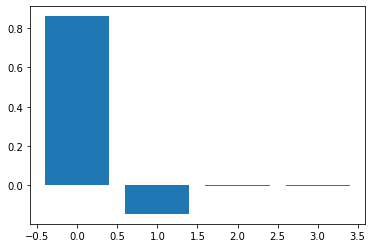

In [477]:
# linear regression feature importance

# our model will be a linear regression model 
model = LinearRegression()
# fit the model
model.fit(col_X_train, col_y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [478]:
#fitting random forest to assist with feature importance - different to the KNN model earlier 

#naming features 0 to as many exist within the model
feature_names = [f"feature {i}" for i in range(col_X_train.shape[1])]


#including random state in here so that it can be reproduced - arbitrary number is used 
random_forest_classifier = RandomForestClassifier(random_state=14)
random_forest_classifier.fit(col_X_train, col_y_train)

RandomForestClassifier(random_state=14)

In [479]:
#creating our MDI values using the random forest classifier 
feat_importances = random_forest_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_classifier.estimators_], axis=0)

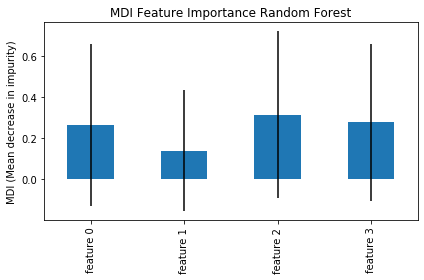

In [480]:
#plotting our MDI for features - this will make it easier to interpret 
forest_importances = pd.Series(feat_importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("MDI Feature Importance Random Forest")
ax.set_ylabel("MDI (Mean decrease in impurity)")
fig.tight_layout()

In [481]:
#correlation matrix

corr_matrix = a.corr()
print(corr_matrix)

                count_blinks  avg_diameter  fixation_count  saccade_count
count_blinks        1.000000     -0.108170        0.942316       0.726173
avg_diameter       -0.108170      1.000000       -0.165441      -0.528406
fixation_count      0.942316     -0.165441        1.000000       0.838692
saccade_count       0.726173     -0.528406        0.838692       1.000000


# Feature Importance second dataset 

In [482]:
#remove missing values - will not be able to convert  these for use in the modelling 

final = final.dropna()

In [483]:
ml_features = final[['CURRENT_SAC_DURATION', 'CURRENT_SAC_BLINK_END', 'RIGHT_PUPIL_SIZE_y']]

In [484]:
ml_target = final['task']

In [485]:
#apply floor because python can't work out that 2.0 is 2
ml_features['CURRENT_SAC_DURATION']=ml_features['CURRENT_SAC_DURATION'].apply(np.floor)
ml_features['CURRENT_SAC_BLINK_END']=ml_features['CURRENT_SAC_BLINK_END'].apply(np.floor)
ml_features['RIGHT_PUPIL_SIZE_y']=ml_features['RIGHT_PUPIL_SIZE_y'].apply(np.floor)

In [486]:
ml_features['CURRENT_SAC_DURATION']=ml_features['CURRENT_SAC_DURATION'].astype(int)
ml_features['CURRENT_SAC_BLINK_END']=ml_features['CURRENT_SAC_BLINK_END'].astype(int)
ml_features['RIGHT_PUPIL_SIZE_y']=ml_features['RIGHT_PUPIL_SIZE_y'].astype(int)

In [487]:
#test-train split

ml_X_train, ml_X_test, ml_y_train, ml_y_test = train_test_split(ml_features, ml_target, test_size=0.3, random_state=61)

Feature: 0, Score: -0.03824
Feature: 1, Score: 0.28948
Feature: 2, Score: -0.03502


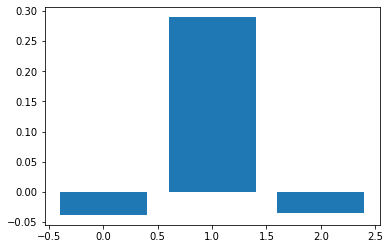

In [488]:
# linear regression feature importance

# our model will be a linear regression model 
model = LinearRegression()
# fit the model
model.fit(ml_X_train, ml_y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [489]:
#fitting random forest to assist with feature importance - different to the KNN model earlier 

#naming features 0 to as many exist within the model
feature_names = [f"feature {i}" for i in range(ml_X_train.shape[1])]


#including random state in here so that it can be reproduced - arbitrary number is used 
random_forest_classifier = RandomForestClassifier(random_state=14)
random_forest_classifier.fit(ml_X_train, ml_y_train)

RandomForestClassifier(random_state=14)

In [490]:
#creating our MDI values using the random forest classifier 
feat_importances = random_forest_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_classifier.estimators_], axis=0)

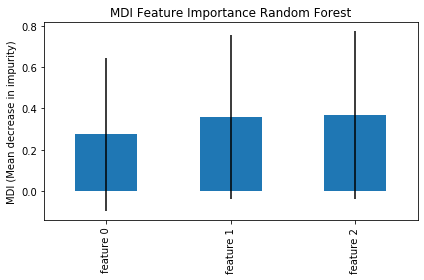

In [491]:
#plotting our MDI for features - this will make it easier to interpret 
forest_importances = pd.Series(feat_importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("MDI Feature Importance Random Forest")
ax.set_ylabel("MDI (Mean decrease in impurity)")
fig.tight_layout()

In [492]:
#correlation matrix

corr_matrix = final.corr()
print(corr_matrix)

                         RECORDING_SESSION_LABEL  CURRENT_SAC_DURATION  \
RECORDING_SESSION_LABEL                 1.000000              0.381533   
CURRENT_SAC_DURATION                    0.381533              1.000000   
CURRENT_SAC_BLINK_END                  -0.699913              0.285921   
RIGHT_PUPIL_SIZE_y                     -0.784572              0.048690   

                         CURRENT_SAC_BLINK_END  RIGHT_PUPIL_SIZE_y  
RECORDING_SESSION_LABEL              -0.699913           -0.784572  
CURRENT_SAC_DURATION                  0.285921            0.048690  
CURRENT_SAC_BLINK_END                 1.000000            0.926859  
RIGHT_PUPIL_SIZE_y                    0.926859            1.000000  


# SVM model

In [493]:
stopiahsdfhjiklp;asdfhbujo;szdfgbjlo;'asfgbjnkl;SZDFGBJL:ASDFBfgvbnjl;sdfcvgbjnkl['']'

#going to use a gridsearch in order to find the best estimators 
#from sklearn.svm import SVC

#going to set C values from 0.1 to 10,000, gamma from 0.00001 to 1 and will test all kernels

# defining parameter range
#param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]} 
#making use of gridsearch to find the optimal values - note verbose = 1 to limit the amount of output we see from python   
#gridsearch = GridSearchCV(SVC(),  param_grid, refit = True, cv = 3, verbose = 1)
  
# fitting the gridsearch onto the model - using our training data 
#gridsearch.fit(col_X_train, col_y_train)

IndentationError: unexpected indent (<ipython-input-493-f57879e64319>, line 10)

In [ ]:
#Using our test set for prediction 

#from sklearn.svm import SVC
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# We found our optimal hyperparameters found earlier, so will now initiate the model using these 
#support_vc=SVC(C=10, gamma=1, kernel='rbf') 

# fit classifier to training set
#support_vc.fit(col_X_train,col_y_train)

# make predictions on test set
#y_pred=support_vc.predict(X_test)

#confm = confusion_matrix(y_test, y_pred)
#acc = accuracy_score(y_test,y_pred)

# getting the accuracy, confusion matrix, precision, recall, F1 and support
#goal here is to be able to compare appropriate metrics across all models - total digits = 4, found that having 2 was not enough and needed to be more granular

#print(classification_report(y_test, y_pred, digits=4))
#print('confusion matrix:')
#print(confm)
#print('accuracy:')
#print(acc)